# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q="



In [5]:
city_name = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []


print("Beginning Data Retrieval")
print("----------------------------")
x=0
for city in cities: 
    try: 
        city_data = requests.get(query_url + city).json()
        x=x+1
        print(f"Processing Record {x} | {city}")
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        max_temps.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        #print(city_name)
    except KeyError: 
        print("city name not found")
        
        #print(city_name)
print("------------------------------")        
print("Data retrieval complete")
        
#try to use if statement to limit the amount that is searching--group of cities in a set, 20 at a time  
#try to use enumerate or iterrows

Beginning Data Retrieval
----------------------------
Processing Record 1 | mataura
Processing Record 2 | illoqqortoormiut
city name not found
Processing Record 3 | nanortalik
Processing Record 4 | marrakesh
Processing Record 5 | coquimbo
Processing Record 6 | lompoc
Processing Record 7 | kapaa
Processing Record 8 | bluff
Processing Record 9 | maniwaki
Processing Record 10 | anar darreh
city name not found
Processing Record 11 | rikitea
Processing Record 12 | general pico
Processing Record 13 | carnarvon
Processing Record 14 | longyearbyen
Processing Record 15 | hobart
Processing Record 16 | lebu
Processing Record 17 | bambous virieux
Processing Record 18 | opuwo
Processing Record 19 | barrow
Processing Record 20 | ambagarh chauki
Processing Record 21 | goderich
Processing Record 22 | sabang
Processing Record 23 | mandalgovi
Processing Record 24 | buenaventura
Processing Record 25 | jamestown
Processing Record 26 | atuona
Processing Record 27 | erie
Processing Record 28 | eureka
Proces

Processing Record 235 | mahibadhoo
Processing Record 236 | cancun
Processing Record 237 | san-pedro
Processing Record 238 | majene
Processing Record 239 | hasaki
Processing Record 240 | sorvag
city name not found
Processing Record 241 | lavrentiya
Processing Record 242 | oyek
Processing Record 243 | namatanai
Processing Record 244 | guiratinga
Processing Record 245 | nokaneng
Processing Record 246 | nova vicosa
Processing Record 247 | klaksvik
Processing Record 248 | ilulissat
Processing Record 249 | tuktoyaktuk
Processing Record 250 | kalnciems
Processing Record 251 | czluchow
Processing Record 252 | burnie
Processing Record 253 | portland
Processing Record 254 | kropotkin
Processing Record 255 | pemangkat
Processing Record 256 | progreso
Processing Record 257 | kudahuvadhoo
Processing Record 258 | san miguel
Processing Record 259 | avera
Processing Record 260 | karkaralinsk
city name not found
Processing Record 261 | saint anthony
Processing Record 262 | ponta do sol
Processing Recor

Processing Record 473 | tonekabon
Processing Record 474 | jinsha
Processing Record 475 | divnomorskoye
Processing Record 476 | nunoa
Processing Record 477 | ponta delgada
Processing Record 478 | college
Processing Record 479 | warah
Processing Record 480 | olinda
Processing Record 481 | tuatapere
Processing Record 482 | emerald
Processing Record 483 | tomatlan
Processing Record 484 | svetlyy
Processing Record 485 | meulaboh
Processing Record 486 | saint-fabien
city name not found
Processing Record 487 | jurm
Processing Record 488 | nhulunbuy
Processing Record 489 | ust-koksa
Processing Record 490 | palauig
Processing Record 491 | iiyama
Processing Record 492 | rio grande
Processing Record 493 | vangaindrano
Processing Record 494 | ternate
Processing Record 495 | kieta
Processing Record 496 | goure
Processing Record 497 | trairi
Processing Record 498 | yar-sale
Processing Record 499 | port augusta
Processing Record 500 | omsukchan
Processing Record 501 | vrangel
Processing Record 502 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#make a dataframe
##add lat_lngs
city_data_df = pd.DataFrame({"City Name": city_name, 
                             "Lat": lat,
                             "Lng": lng,
                              "Max Temp": max_temps, 
                              "Humidity": humidity, 
                              "Cloudiness": cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date})
city_data_df.head(10)

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,63.00,60,86,7.00,NZ,1603409019
1,Nanortalik,60.14,-45.24,29.35,84,0,10.07,GL,1603408779
2,Marrakesh,31.63,-8.01,64.40,68,75,5.82,MA,1603408760
3,Coquimbo,-29.95,-71.34,55.40,82,75,9.17,CL,1603408770
4,Lompoc,34.64,-120.46,68.00,72,20,9.17,US,1603408882
5,Kapaa,22.08,-159.32,86.00,58,40,12.75,US,1603409020
6,Bluff,-46.60,168.33,63.00,58,100,8.01,NZ,1603408764
7,Maniwaki,46.38,-75.97,41.95,86,96,3.56,CA,1603409058
8,Rikitea,-23.12,-134.97,74.61,80,92,15.39,PF,1603408764
9,General Pico,-35.66,-63.76,61.11,90,99,9.84,AR,1603409059


In [18]:
#export to .csv
city_data_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.
#city_data_df.loc[city_data_df["Humidity"]>100]

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_df = city_data_df[city_data_df["Humidity"]>100]
#clean_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

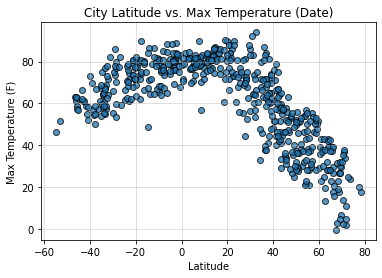

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVStemp.png")
plt.show()
#use images in ReadMe on GitHub, choose at least all latitude plots, and some others 

## Latitude vs. Humidity Plot

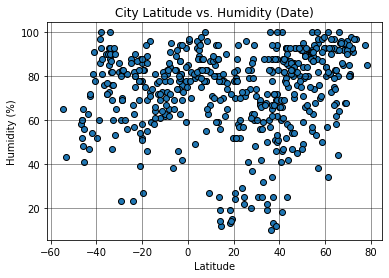

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVShumidity.png")
plt.show()
plt.show()

## Latitude vs. Cloudiness Plot

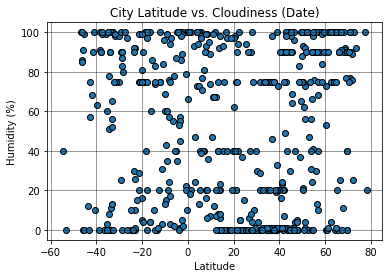

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVScloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

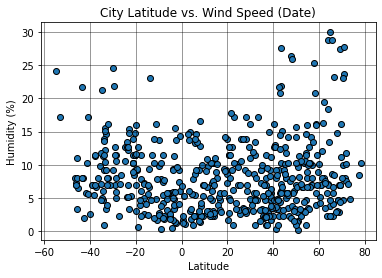

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/latitudeVSwindspeed.png")
plt.show()

## Linear Regression

In [14]:
#make a df with the Northern Hemisphere cities
#city_data_df.loc[city_data_df["Humidity"]>80]

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]
northern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nanortalik,60.14,-45.24,29.35,84,0,10.07,GL,1603408779
2,Marrakesh,31.63,-8.01,64.40,68,75,5.82,MA,1603408760
4,Lompoc,34.64,-120.46,68.00,72,20,9.17,US,1603408882
5,Kapaa,22.08,-159.32,86.00,58,40,12.75,US,1603409020
7,Maniwaki,46.38,-75.97,41.95,86,96,3.56,CA,1603409058


In [15]:
#make a df with the Southern Hemisphere cities
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,63.00,60,86,7.00,NZ,1603409019
3,Coquimbo,-29.95,-71.34,55.40,82,75,9.17,CL,1603408770
6,Bluff,-46.60,168.33,63.00,58,100,8.01,NZ,1603408764
8,Rikitea,-23.12,-134.97,74.61,80,92,15.39,PF,1603408764
9,General Pico,-35.66,-63.76,61.11,90,99,9.84,AR,1603409059


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7303808836861344


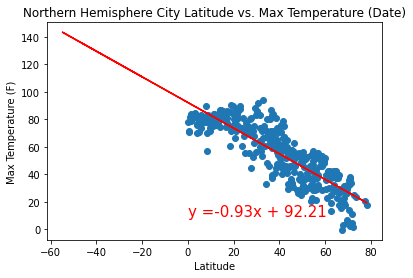

In [49]:
#create scatter plot
# plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# #add regression line
# plt.plot(lat, max_temps, "r-")

#add title and labels
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plt.rc('grid', linestyle="-", color='black')
#plt.grid(True, alpha=0.5)

#find linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept
(n_max_temp_slope, n_max_temp_intercept, n_max_temp_rvalue, n_max_temp_pvalue, n_max_temp_stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
n_max_temp_regress_values = np.asarray(lat) * n_max_temp_slope + n_max_temp_intercept

#calculate r-squared
n_max_temp_rsquared = n_max_temp_rvalue**2
print(f"The r-squared is: {n_max_temp_rsquared}")

#line equation y = mx + b
n_max_temp_line_eq = "y =" + str(round(n_max_temp_slope,2)) + "x + " + str(round(n_max_temp_intercept,2))

#create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
#add regression line
plt.plot(lat, n_max_temp_regress_values, "r-")

#add annotation to plot
plt.annotate(n_max_temp_line_eq,(0,10), fontsize=15, color="red")

plt.savefig("Images/n_hemi_latitudeVStemp.png")
plt.show()

##change r-squared to r-value? 
##change x and y axis limits to x=0-80, y=0-120

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression